### Load required packages and libraries

In [6]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import pandas_profiling
from pandas_profiling import ProfileReport



### Explore the data from a high level

In [7]:
df = pd.read_csv('default_clients_headers.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_mo
0,1,20000.0,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000.0,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000.0,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000.0,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000.0,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [8]:
#Run a pandas profile report
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [9]:
#Create and interactive html of the report and export it to the source folder
profile.to_file(output_file='output.html')

In [10]:
#All data types will need to be intergers before building the regression model
df.dtypes

ID                   int64
LIMIT_BAL          float64
SEX                 object
EDUCATION           object
MARRIAGE             int64
AGE                  int64
PAY_0                int64
PAY_2                int64
PAY_3                int64
PAY_4                int64
PAY_5                int64
PAY_6                int64
BILL_AMT1            int64
BILL_AMT2            int64
BILL_AMT3            int64
BILL_AMT4            int64
BILL_AMT5            int64
BILL_AMT6            int64
PAY_AMT1             int64
PAY_AMT2             int64
PAY_AMT3             int64
PAY_AMT4             int64
PAY_AMT5             int64
PAY_AMT6             int64
default_next_mo     object
dtype: object

In [11]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_next_mo'],
      dtype='object')

### Explore the data from specific groups to understand demographics

In [102]:
age = df['AGE'].dropna()

Text(0.5, 1.0, "Distribution of Customers' Ages")

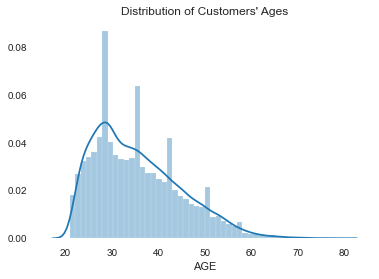

In [103]:
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Customers' Ages")

In [12]:
df.groupby('SEX')['SEX'].count()

SEX
female    18112
male      11888
Name: SEX, dtype: int64

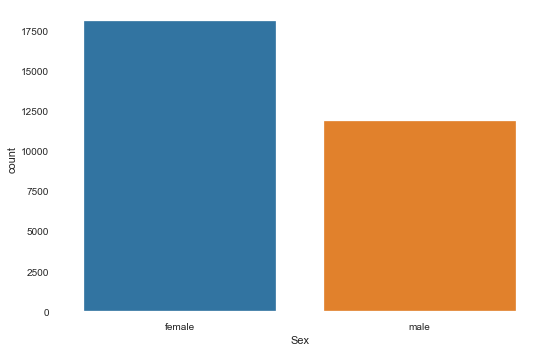

In [13]:
%matplotlib inline
fg = sns.catplot('SEX', data=df, kind='count', aspect=1.5)
fg.set_xlabels('Sex')
plt.show()

In [14]:
df.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
graduate school    10585
high school         4917
other                468
university         14030
Name: EDUCATION, dtype: int64

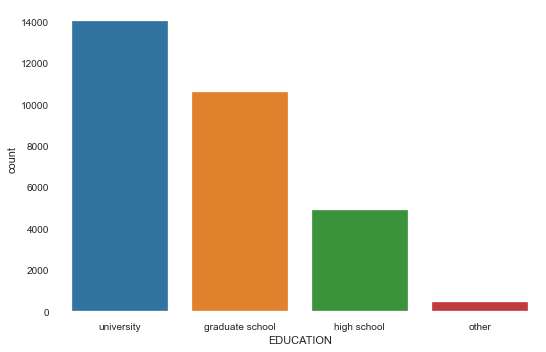

In [15]:
sns.catplot('EDUCATION', data=df, kind='count', aspect=1.5)

In [16]:
df.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

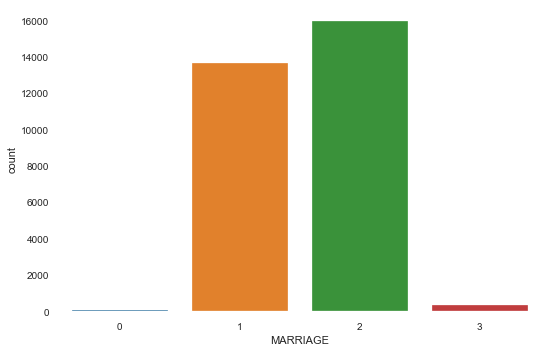

In [17]:
sns.factorplot('MARRIAGE', data=df, kind='count', aspect=1.5)

In [18]:
df.groupby('default_next_mo')['default_next_mo'].count()

default_next_mo
default         6636
not default    23364
Name: default_next_mo, dtype: int64

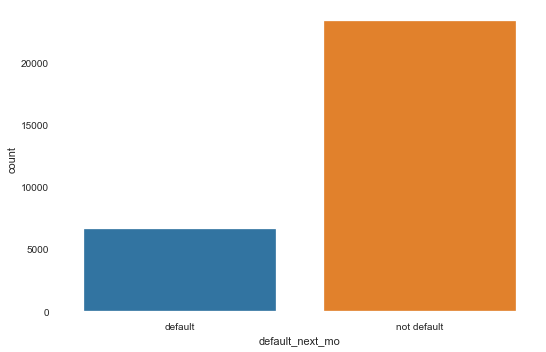

In [19]:
sns.factorplot('default_next_mo', data=df, kind='count', aspect=1.5)

In [20]:
#g = sns.factorplot('EDUCATION', data=df, hue='Age_group', kind='count', aspect=1.75)
#g.set_xlabels('Education level by Age Group')

### Explore defaults by demographics

In [21]:
df.groupby(['EDUCATION', 'default_next_mo'])['EDUCATION'].count()

EDUCATION        default_next_mo
graduate school  default             2036
                 not default         8549
high school      default             1237
                 not default         3680
other            default               33
                 not default          435
university       default             3330
                 not default        10700
Name: EDUCATION, dtype: int64

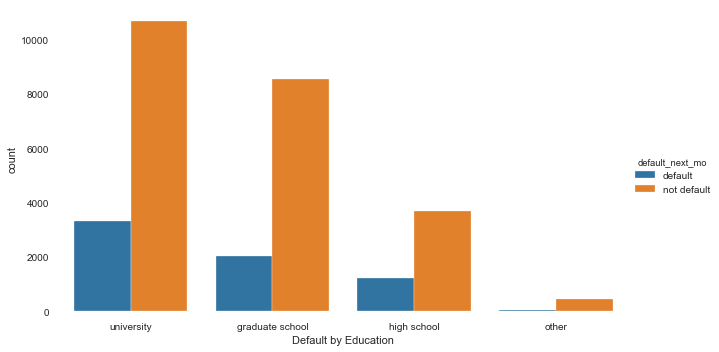

In [22]:
g = sns.factorplot('EDUCATION', data=df, hue='default_next_mo', kind='count', aspect=1.75)
g.set_xlabels('Default by Education')

In [23]:
df.groupby(['MARRIAGE', 'default_next_mo'])['MARRIAGE'].count()

MARRIAGE  default_next_mo
0         default                5
          not default           49
1         default             3206
          not default        10453
2         default             3341
          not default        12623
3         default               84
          not default          239
Name: MARRIAGE, dtype: int64

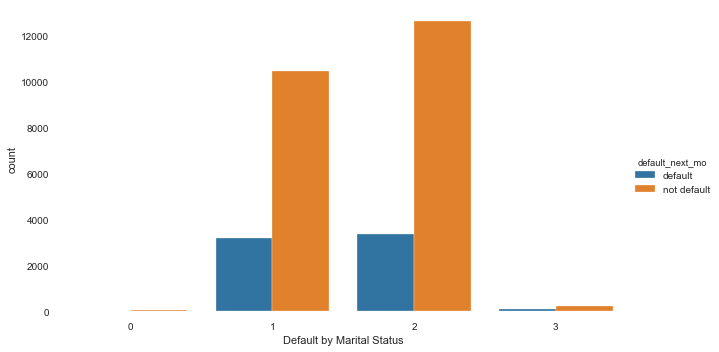

In [24]:
g = sns.factorplot('MARRIAGE', data=df, hue='default_next_mo', kind='count', aspect=1.75)
g.set_xlabels('Default by Marital Status')

In [25]:
df.groupby(['SEX', 'default_next_mo'])['SEX'].count()

SEX     default_next_mo
female  default             3763
        not default        14349
male    default             2873
        not default         9015
Name: SEX, dtype: int64

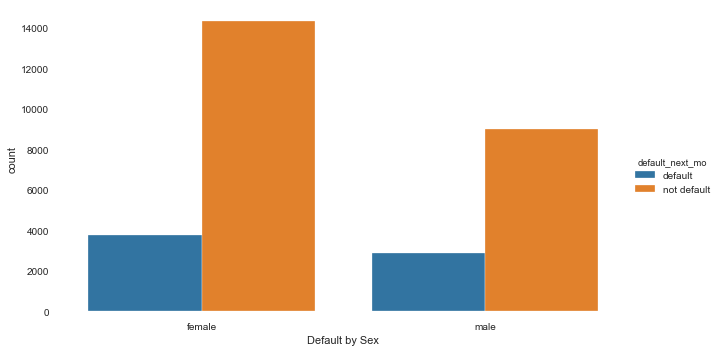

In [26]:
g = sns.factorplot('SEX', data=df, hue='default_next_mo', kind='count', aspect=1.75)
g.set_xlabels('Default by Sex')

### Explore the default customers

In [29]:
#Create a boolean default column
defaulted = df['default_next_mo'] == 'default'
df['defaulted'] = defaulted


In [32]:
#Create a boolean not default column
not_defaulted = df['default_next_mo'] == 'not default'
df['not_defaulted'] = not_defaulted

In [33]:
#View total default and not defauts
df.groupby('defaulted')['defaulted'].count()

defaulted
False    23364
True      6636
Name: defaulted, dtype: int64

In [34]:
#Create a interger default column
enc = LabelEncoder()
df['defaulted_enc'] = enc.fit_transform(df['defaulted'])
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_mo,defaulted,not_defaulted,defaulted_enc
0,1,20000.0,female,university,1,24,2,2,-1,-1,...,0,689,0,0,0,0,default,True,False,1
1,2,120000.0,female,university,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,default,True,False,1
2,3,90000.0,female,university,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,not default,False,True,0
3,4,50000.0,female,university,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,not default,False,True,0
4,5,50000.0,male,university,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,not default,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,male,high school,1,39,0,0,0,0,...,8500,20000,5003,3047,5000,1000,not default,False,True,0
29996,29997,150000.0,male,high school,2,43,-1,-1,-1,-1,...,1837,3526,8998,129,0,0,not default,False,True,0
29997,29998,30000.0,male,university,2,37,4,3,2,-1,...,0,0,22000,4200,2000,3100,default,True,False,1
29998,29999,80000.0,male,high school,1,41,1,-1,0,0,...,85900,3409,1178,1926,52964,1804,default,True,False,1


In [35]:
#Bin the age column to explore age group default rates later
df_age_bins = df['Age_group'] = pd.cut(x = df['AGE'], bins = [17,40,60,80,100],
                                       labels = ['Millennials','Generation X','Baby Boomers','Silent Generation'])

In [36]:
#number of people who defaulted at each education level grouped by age
df.pivot_table('defaulted', 'Age_group', 'EDUCATION', aggfunc=np.sum, margins=True)

EDUCATION,graduate school,high school,other,university,All
Age_group,,,,,
Millennials,1582.0,604.0,17.0,2457.0,4660.0
Generation X,438.0,604.0,16.0,845.0,1903.0
Baby Boomers,16.0,29.0,0.0,28.0,73.0
All,2036.0,1237.0,33.0,3330.0,6636.0


In [38]:
#Age and edduccation of people who did not default
df.pivot_table('not_defaulted', 'Age_group', 'EDUCATION', aggfunc=np.sum, margins=True)

EDUCATION,graduate school,high school,other,university,All
Age_group,,,,,
Millennials,6857.0,1857.0,307.0,8045.0,17066.0
Generation X,1637.0,1735.0,125.0,2602.0,6099.0
Baby Boomers,55.0,88.0,3.0,53.0,199.0
All,8549.0,3680.0,435.0,10700.0,23364.0


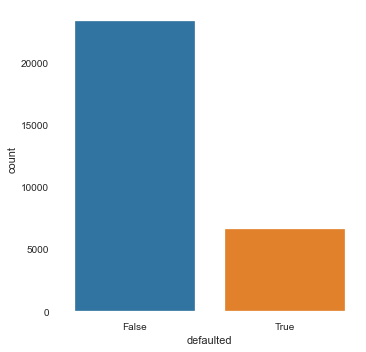

In [39]:
#Total number of people who defaulted vs. who didn't
sns.factorplot('defaulted', data=df, kind='count')

In [41]:
#Transform the boolean for defaults so default  = 1
not_defaulted = df['default_next_mo'] == 'not default'
df['not defaulted'] = not_defaulted
df['not_defaulted_enc'] = enc.fit_transform(df['not defaulted'])
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_mo,defaulted,not_defaulted,defaulted_enc,Age_group,not defaulted,not_defaulted_enc
0,1,20000.0,female,university,1,24,2,2,-1,-1,...,0,0,0,default,True,False,1,Millennials,False,0
1,2,120000.0,female,university,2,26,-1,2,0,0,...,1000,0,2000,default,True,False,1,Millennials,False,0
2,3,90000.0,female,university,2,34,0,0,0,0,...,1000,1000,5000,not default,False,True,0,Millennials,True,1
3,4,50000.0,female,university,1,37,0,0,0,0,...,1100,1069,1000,not default,False,True,0,Millennials,True,1
4,5,50000.0,male,university,1,57,-1,0,-1,0,...,9000,689,679,not default,False,True,0,Generation X,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,male,high school,1,39,0,0,0,0,...,3047,5000,1000,not default,False,True,0,Millennials,True,1
29996,29997,150000.0,male,high school,2,43,-1,-1,-1,-1,...,129,0,0,not default,False,True,0,Generation X,True,1
29997,29998,30000.0,male,university,2,37,4,3,2,-1,...,4200,2000,3100,default,True,False,1,Millennials,False,0
29998,29999,80000.0,male,high school,1,41,1,-1,0,0,...,1926,52964,1804,default,True,False,1,Generation X,False,0


### Explore Limit Balances

In [42]:
#Description of all limit balances
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

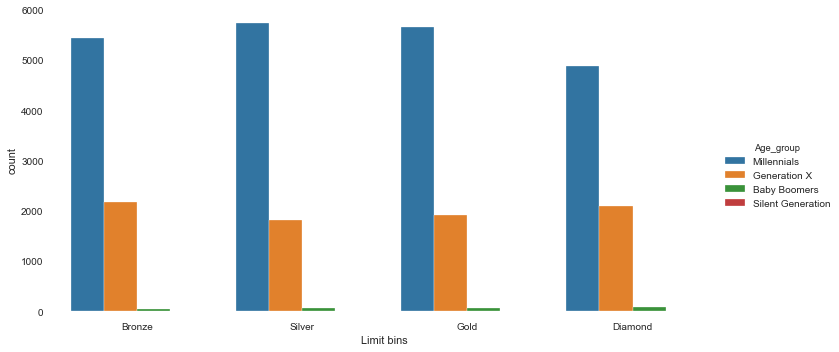

In [109]:
#Factorplot of customers splitted into sex, children and class
sns.factorplot('Limit bins', data=df, kind='count', hue='Age_group',aspect=2)

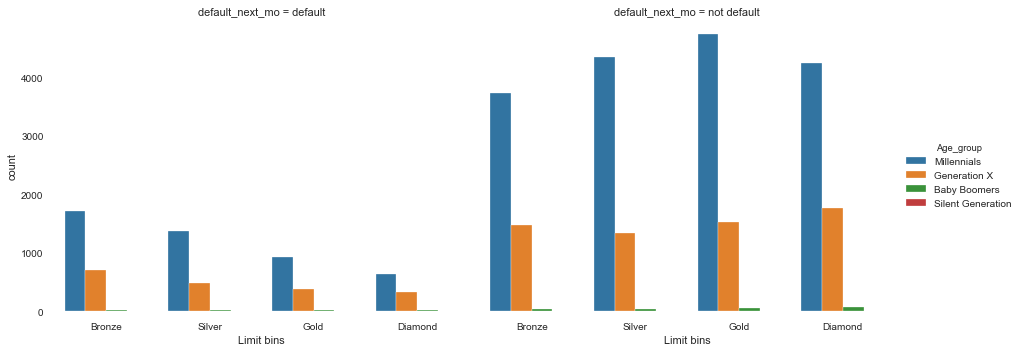

In [111]:
# Do the same as above, but split the passengers into either survived or not
sns.factorplot('Limit bins', data=df, kind='count', hue='Age_group', col='default_next_mo', aspect=1.25, size=5)

In [43]:
#create default only df in order to explore defaults relation to limit balance
defCust_df = df[(df['default_next_mo'] == "default")]
defCust_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_mo,defaulted,not_defaulted,defaulted_enc,Age_group,not defaulted,not_defaulted_enc
0,1,20000.0,female,university,1,24,2,2,-1,-1,...,0,0,0,default,True,False,1,Millennials,False,0
1,2,120000.0,female,university,2,26,-1,2,0,0,...,1000,0,2000,default,True,False,1,Millennials,False,0
13,14,70000.0,male,university,2,30,1,2,2,0,...,3000,1500,0,default,True,False,1,Millennials,False,0
16,17,20000.0,male,graduate school,2,24,0,0,2,2,...,0,1650,0,default,True,False,1,Millennials,False,0
21,22,120000.0,female,university,1,39,-1,-1,-1,-1,...,632,316,0,default,True,False,1,Millennials,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,29992,210000.0,male,university,1,34,3,2,2,2,...,0,0,0,default,True,False,1,Millennials,False,0
29994,29995,80000.0,male,university,2,34,2,2,2,2,...,7000,0,4000,default,True,False,1,Millennials,False,0
29997,29998,30000.0,male,university,2,37,4,3,2,-1,...,4200,2000,3100,default,True,False,1,Millennials,False,0
29998,29999,80000.0,male,high school,1,41,1,-1,0,0,...,1926,52964,1804,default,True,False,1,Generation X,False,0


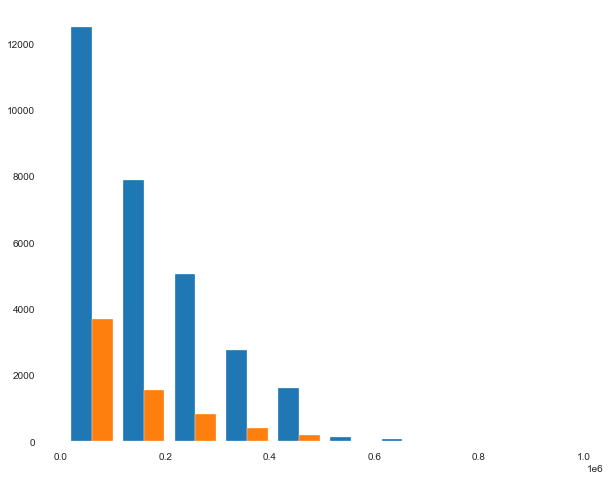

In [46]:
#Plot defaults and limit balance hist with total hist
plt.figure(figsize=[10,8])
x = df['LIMIT_BAL']
y = defCust_df['LIMIT_BAL']
n, bins, patches = plt.hist([x,y])
plt.show()

In [47]:
#Bin the limits into quartiles and name them
df_limit_bins = df['Limit bins'] = pd.qcut(df['LIMIT_BAL'], q=4,
                                       labels = ['Bronze','Silver','Gold','Diamond'])
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT5,PAY_AMT6,default_next_mo,defaulted,not_defaulted,defaulted_enc,Age_group,not defaulted,not_defaulted_enc,Limit bins
0,1,20000.0,female,university,1,24,2,2,-1,-1,...,0,0,default,True,False,1,Millennials,False,0,Bronze
1,2,120000.0,female,university,2,26,-1,2,0,0,...,0,2000,default,True,False,1,Millennials,False,0,Silver
2,3,90000.0,female,university,2,34,0,0,0,0,...,1000,5000,not default,False,True,0,Millennials,True,1,Silver
3,4,50000.0,female,university,1,37,0,0,0,0,...,1069,1000,not default,False,True,0,Millennials,True,1,Bronze
4,5,50000.0,male,university,1,57,-1,0,-1,0,...,689,679,not default,False,True,0,Generation X,True,1,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,male,high school,1,39,0,0,0,0,...,5000,1000,not default,False,True,0,Millennials,True,1,Gold
29996,29997,150000.0,male,high school,2,43,-1,-1,-1,-1,...,0,0,not default,False,True,0,Generation X,True,1,Gold
29997,29998,30000.0,male,university,2,37,4,3,2,-1,...,2000,3100,default,True,False,1,Millennials,False,0,Bronze
29998,29999,80000.0,male,high school,1,41,1,-1,0,0,...,52964,1804,default,True,False,1,Generation X,False,0,Silver


In [48]:
#Create a default onlyu dataframe with limit bins
df_limit_bins = defCust_df['Limit bins'] = pd.qcut(df['LIMIT_BAL'], q=4,
                                       labels = ['Bronze','Silver','Gold','Diamond'])
defCust_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT5,PAY_AMT6,default_next_mo,defaulted,not_defaulted,defaulted_enc,Age_group,not defaulted,not_defaulted_enc,Limit bins
0,1,20000.0,female,university,1,24,2,2,-1,-1,...,0,0,default,True,False,1,Millennials,False,0,Bronze
1,2,120000.0,female,university,2,26,-1,2,0,0,...,0,2000,default,True,False,1,Millennials,False,0,Silver
13,14,70000.0,male,university,2,30,1,2,2,0,...,1500,0,default,True,False,1,Millennials,False,0,Silver
16,17,20000.0,male,graduate school,2,24,0,0,2,2,...,1650,0,default,True,False,1,Millennials,False,0,Bronze
21,22,120000.0,female,university,1,39,-1,-1,-1,-1,...,316,0,default,True,False,1,Millennials,False,0,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,29992,210000.0,male,university,1,34,3,2,2,2,...,0,0,default,True,False,1,Millennials,False,0,Gold
29994,29995,80000.0,male,university,2,34,2,2,2,2,...,0,4000,default,True,False,1,Millennials,False,0,Silver
29997,29998,30000.0,male,university,2,37,4,3,2,-1,...,2000,3100,default,True,False,1,Millennials,False,0,Bronze
29998,29999,80000.0,male,high school,1,41,1,-1,0,0,...,52964,1804,default,True,False,1,Generation X,False,0,Silver


In [49]:
df['Limit bins'].value_counts()

Bronze     7676
Gold       7643
Silver     7614
Diamond    7067
Name: Limit bins, dtype: int64

In [50]:
#Create a sample of the dataframe for plotting purposes
data_sample = df.sample(100)

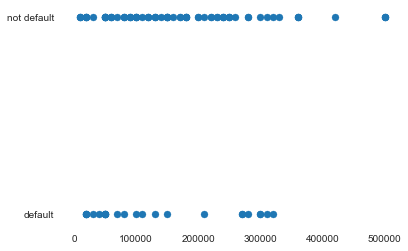

In [52]:
#Create a scatter plot to show relation between Limit balances and defaults
x = data_sample['LIMIT_BAL']
y = data_sample['default_next_mo']
plt.scatter(x,y, marker = 'o')
plt.show()

In [58]:
#Display the binned limit group counts
df.groupby('Limit bins')['Limit bins'].count()

Limit bins
Bronze     7676
Silver     7614
Gold       7643
Diamond    7067
Name: Limit bins, dtype: int64

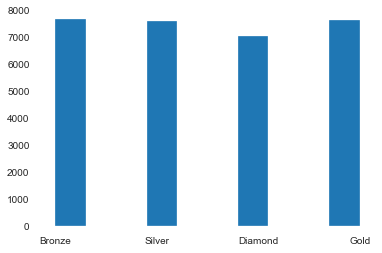

In [66]:
plt.hist(df['LIMIT_BAL'], bins = 10)
plt.show()

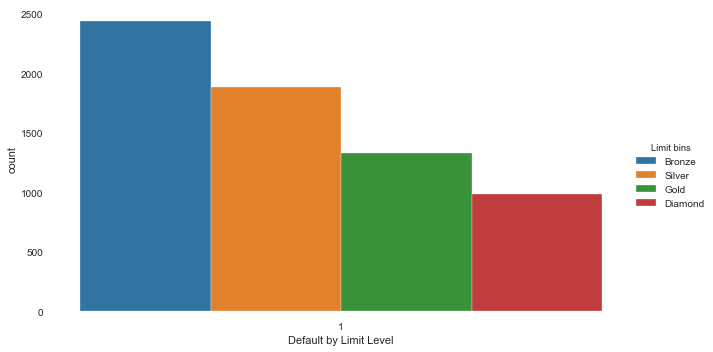

In [69]:
g= sns.factorplot('defaulted_enc', data=defCust_df, hue='Limit bins', kind='count', aspect=1.75)
g.set_xlabels('Default by Limit Level')

In [62]:
#show default rates in each group
#code not working, need to workout "str" error
df['LIMIT_BAL']=pd.qcut(df['LIMIT_BAL'], 4, labels=['Bronze', 'Silver', 'Gold', 'Diamond'])
default = df['LIMIT_BAL'][df['defaulted']==True].value_counts()
Total=df['LIMIT_BAL'].value_counts()
default/Total*100

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [63]:
#show default rates in each group

Total=df.groupby('Limit bins')['Limit bins'].count()
default = df[df['defaulted_enc']==1].groupby('LIMIT_BAL')['LIMIT_BAL'].count()
default/Total*100

LIMIT_BAL
Bronze     31.787389
Silver     24.717625
Gold       17.349208
Diamond    13.980473
dtype: float64

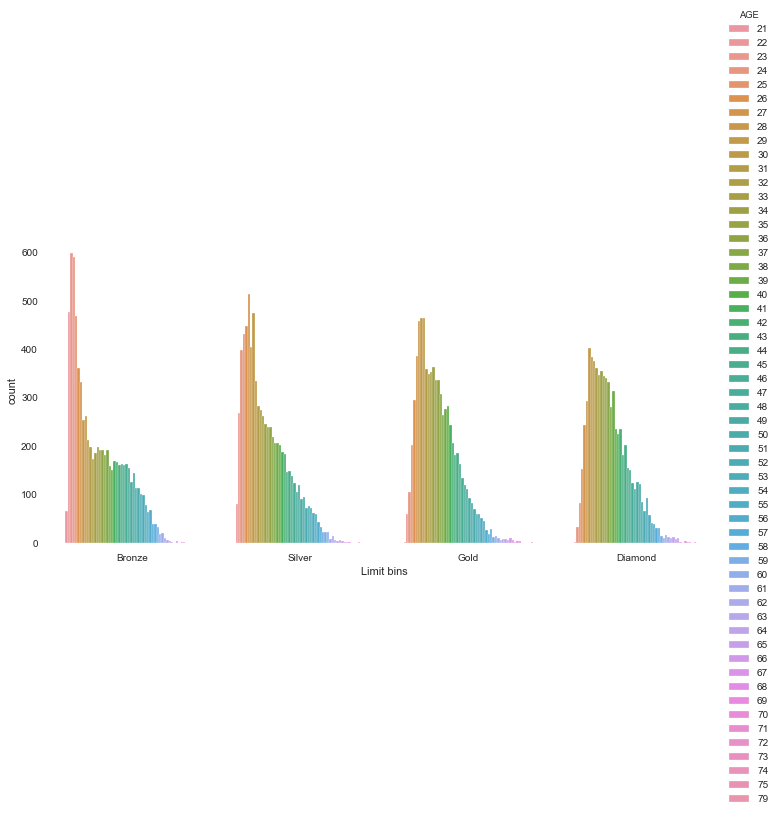